In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

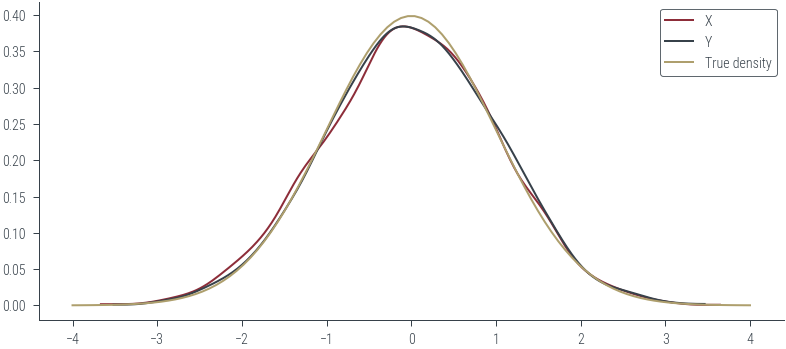

In [30]:
N = 5000
U = torch.rand(N, 2)
U1 = U[:, 0]
U2 = U[:, 1]

R = torch.sqrt(-2 * torch.log(U1))
theta = 2 * np.pi * U2

X = R * torch.cos(theta)
Y = R * torch.sin(theta)

az.plot_kde(X.numpy(), label='X', plot_kwargs={'color': 'C0'})
az.plot_kde(Y.numpy(), label='Y', plot_kwargs={'color': 'C1'})

# Plot true density
x = torch.linspace(-4, 4, 100)
norm = torch.distributions.Normal(0, 1)
plt.plot(x, norm.log_prob(x).exp().numpy(), label='True density', color='C2')

plt.legend()


In [31]:
### Multivariate Sampling



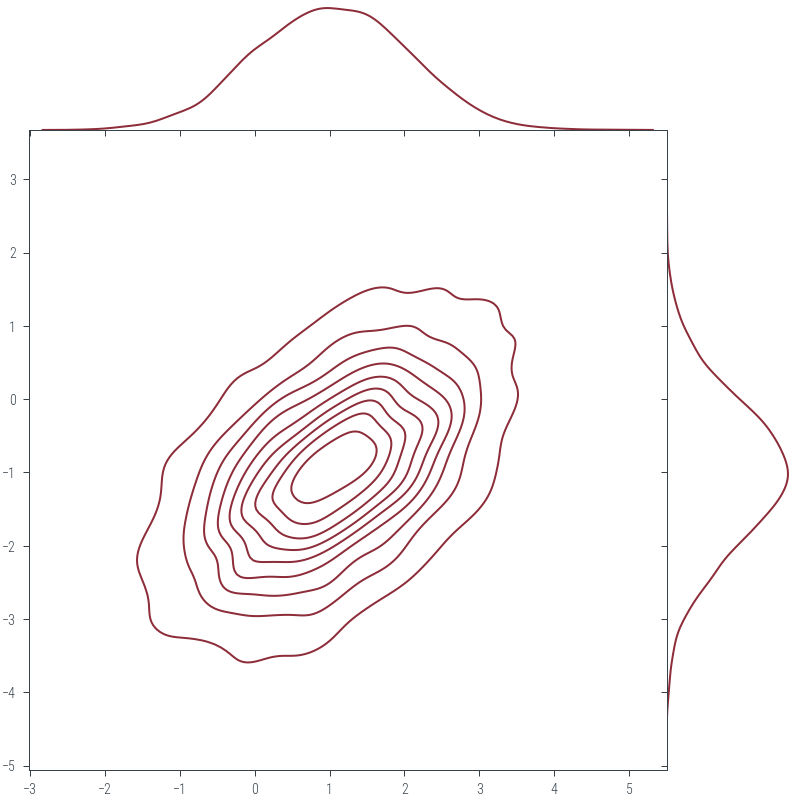

In [32]:
from scipy.stats import gaussian_kde

true_mean = torch.tensor([1., -1.])
true_cov = torch.tensor([[1., 0.5], [0.5, 1.]])
true_dist = torch.distributions.MultivariateNormal(true_mean, true_cov)

samples = true_dist.sample((N,))

# Generate samples from the true distribution
N = 4000  # Number of samples
samples = true_dist.sample((N,))

sample_data = samples.numpy()

# Calculate KDE using scipy's gaussian_kde
sns.jointplot(x=sample_data[:, 0], y=sample_data[:, 1], kind="kde", space=0, color='C0')


In [33]:
# Find the cholesky decomposition of the covariance matrix
L = torch.cholesky(true_cov)
print(L)

tensor([[1.0000, 0.0000],
        [0.5000, 0.8660]])


In [34]:
L@L.T

tensor([[1.0000, 0.5000],
        [0.5000, 1.0000]])

In [35]:
X

tensor([ 0.6383,  0.1196, -0.6610,  ..., -1.2854, -0.0679, -0.8292])

In [36]:
Y.shape

torch.Size([5000])

In [38]:
Z_I = torch.stack([X, Y], dim=1)

Z_mu_sigma = Z_I @ L.T + true_mean

In [40]:
Z_mu_sigma.shape

torch.Size([5000, 2])

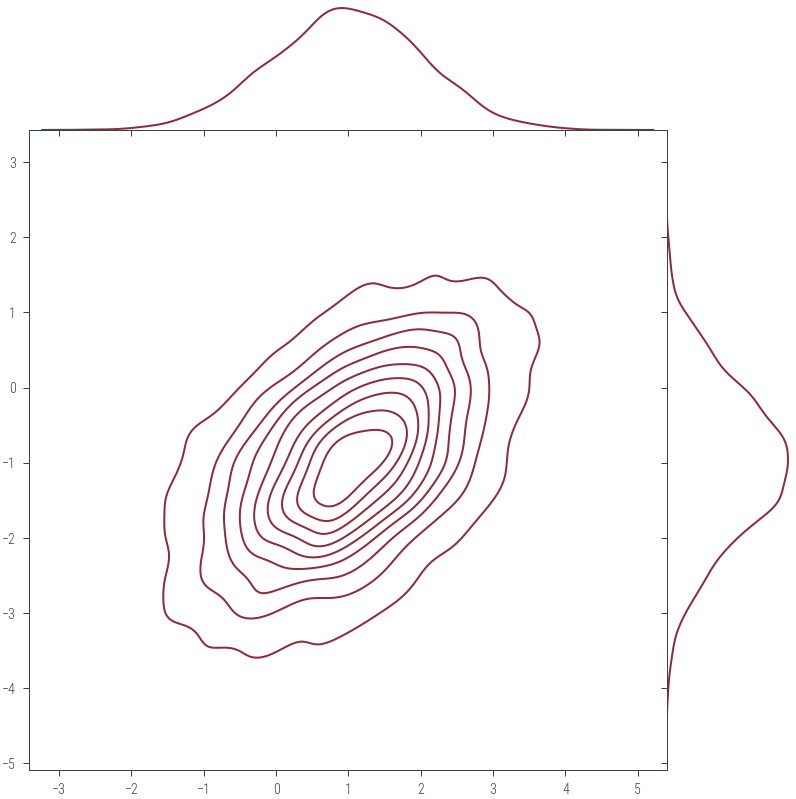

In [41]:
sns.jointplot(x=Z_mu_sigma.numpy()[:, 0], y=Z_mu_sigma.numpy()[:, 1], kind="kde", space=0, color='C0')

In [43]:
np.cov(Z_mu_sigma.numpy().T)

array([[1.05325545, 0.51403749],
       [0.51403749, 1.01457316]])

In [44]:
np.mean(Z_mu_sigma.numpy(), axis=0)

array([ 0.9873801, -0.992024 ], dtype=float32)